# Interpolant

Here we will analyze some of the basics of the Interpolant type classes.

In [1]:
# import the required packages
%matplotlib notebook
import numpy as np
import inspect
from ipywidgets import *
import matplotlib.pyplot as plt
# we'll need Matrix, UGrid, and Interpolator
from etraj import Vector, Matrix, UGrid, LocalTaylorInterpolator, ScalarField
from etraj import Interpolant, LocalTaylorInterpolant
import etraj

Let's see what the different methods are that are available in the base class.

In [2]:
# grab the attributes of Interpolant
attributes = dir(Interpolant)
attributes = [a for a in attributes if a[0] != "_"]

# print the ones which are not built in
print("#: function")
print("++++++++++++++++++")
for i in range(len(attributes)):
    print("%s: %s()" % (i+1,attributes[i]))

#: function
++++++++++++++++++
1: dim()
2: get_dim()
3: get_name()
4: get_range()
5: get_range_max()
6: get_range_min()
7: get_ranges()
8: name()
9: ranges()
10: set_dim()
11: set_name()
12: set_range()
13: set_range_max()
14: set_range_min()
15: set_ranges()


In [3]:
inter = Interpolant()

In [4]:
inter.set_name("new_name")
inter.set_dim(2)
inter.set_ranges([[0,1],[0,1]])

In [5]:
# create a random one-dimensional grid
# between -pi and pi.
N = 1000
x = np.random.uniform(-np.pi,np.pi,N)
x_grid = [[x[i]] for i in range(N)]

g = UGrid(x_grid)
# generate the function values for f(x) = cos(x)
f = np.cos(1.5*x)
# create a scalar field using g and f
s = ScalarField(Grid=g,field=f,log=g.log)
lte = LocalTaylorInterpolator(g)
s.Interpolator = lte

In [6]:
order = 10
point = [np.pi/2]
LTI = etraj.create_local_taylor_interpolant(s,point,order)

In [7]:
print(LTI.expansion_point)
print(LTI.expansion_coefficients)
print(LTI.n)

[1.5707963267948966]
[-0.7071729510761265, -1.0605860072775455, 0.7961611749899196, 0.39766065589972716, -0.15029139173151795, -0.04502765186335607, 0.011784354821158543, 0.002716439527001751, -0.0005009582133389919, -0.00015218155761886228, -9.68834727163017e-06]
10


In [11]:
var_e = .5
y = np.random.uniform(point[0]-var_e,point[0]+var_e,N)
y = [[y[i]] for i in range(len(y))]
new_f = LTI(y)

<IPython.core.display.Javascript object>


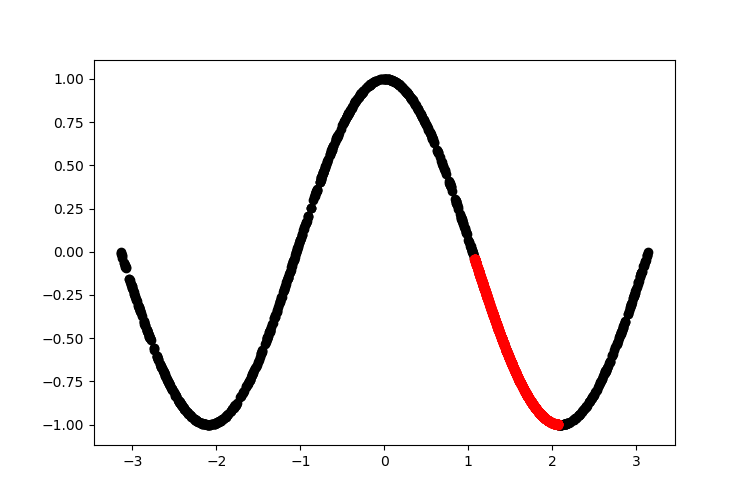

In [12]:
fig, axs = plt.subplots(figsize=(7.5,5))
axs.scatter(x,f,color='k')
axs.scatter(y,new_f,color='r')

In [10]:
y = np.random.uniform(-np.pi,np.pi,N)
new_f = [LTI([y[i]]) for i in range(len(y))]

<IPython.core.display.Javascript object>


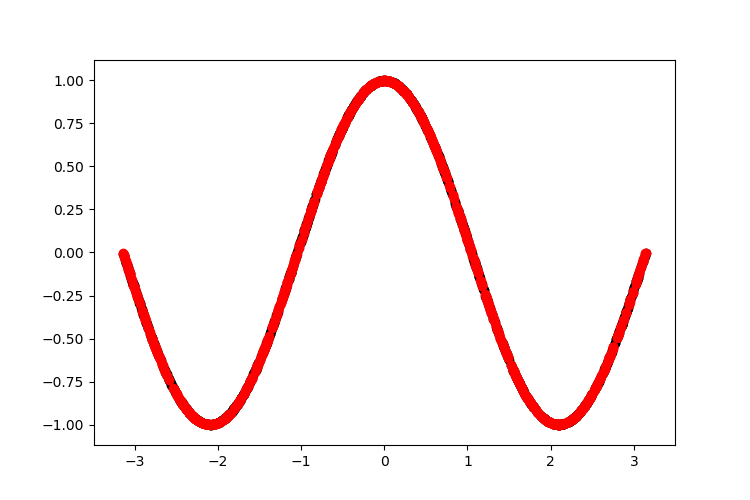

In [11]:
fig, axs = plt.subplots(figsize=(7.5,5))
axs.scatter(x,f,color='k')
axs.scatter(y,new_f,color='r')